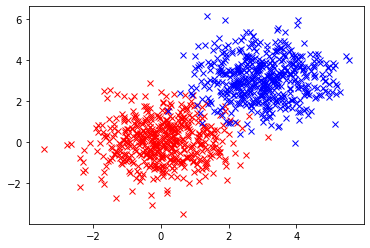

In [25]:
import numpy as np
import matplotlib.pyplot as plt

set1 = np.random.randn(500, 2)
set2 = np.random.randn(500, 2) + 3

observations = np.concatenate((set1, set2), axis=0) 
targets = np.concatenate((np.zeros((500, 1)), np.ones((500, 1))), axis=0)

plt.plot(observations[:500, 0], observations[:500, 1], 'rx')
plt.plot(observations[500:, 0], observations[500:, 1], 'bx')


#new_point = np.array([[4, 4]])



def classify(new_point):
  dists = observations - new_point
  dists = np.sqrt(dists[:, 0]**2 + dists[:, 1]**2)
  idxs = dists.argsort()
  new_point_label = targets[idxs[0]]
  
  return new_point_label



res = 200
[X, Y] = np.meshgrid(np.linspace(-2, 10, res), np.linspace(-2, 10, res))
labels = np.zeros(np.shape(X))
lind = 0
for ind_x in range(res):
  for ind_y in range(res):
    lind = lind + 1
    labels[ind_x, ind_y] = classify(np.array([X[ind_x, ind_y], Y[ind_x, ind_y]]))



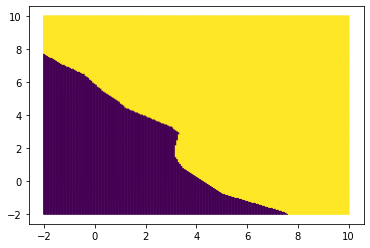

In [8]:
res = 200
[X, Y] = np.meshgrid(np.linspace(-2, 10, res), np.linspace(-2, 10, res))
labels = np.zeros(np.shape(X))
lind = 0
for ind_x in range(res):
  for ind_y in range(res):
    lind = lind + 1
    labels[ind_x, ind_y] = classify(np.array([X[ind_x, ind_y], Y[ind_x, ind_y]]))
plt.scatter(X, Y, c=labels, s=1)

In [30]:
def classify(new_point, k = 1):
  dists = observations - new_point
  dists = np.sqrt(dists[:, 0]**2 + dists[:, 1]**2)
  idxs = dists.argsort()
  new_point_label = targets[idxs[:k]]
  return int(stats.mode(new_point_label)[0][0][0])

from scipy import stats

new_point = np.array([[3, 3]])

import time

t = time.time()
print(classify(new_point, k = 3))
elapsed = time.time() - t

#print(elapsed)

#classify(new_point, k = 3)


1


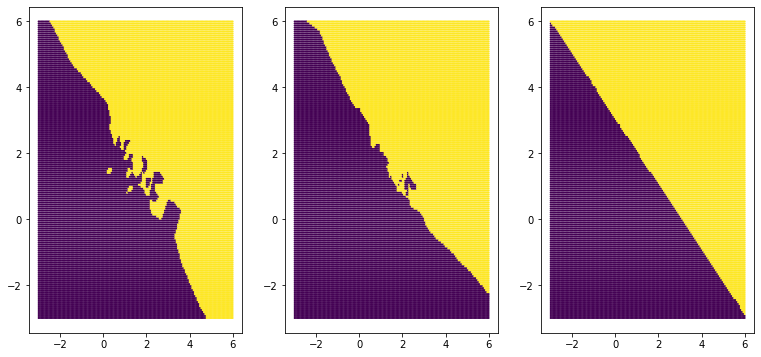

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(13, 6))
ix = 0
for k in [1, 5, 500]:
  res = 150
  [X, Y] = np.meshgrid(np.linspace(-3, 6, res), np.linspace(-3, 6, res))
  labels = np.zeros(np.shape(X))
  lind = 0
  for ind_x in range(res):
    for ind_y in range(res):
      lind = lind + 1
      labels[ind_x, ind_y] = classify(np.array([X[ind_x, ind_y], Y[ind_x, ind_y]]), k)
  ax[ix].scatter(X, Y, c=labels, s=1)
  ix += 1